# <img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFFY-15-M Cyber Security Analytics

# Portfolio Task 1:
## Conduct an investigation on a web application to identify malicious attack activity using Python data science libraries 
---

**Student Name:** Rifat Tasnim Anannya<br>
<b>ID:</b> 21045383<br>
<b>Module Instructor:</b> Dr Phil Legg<br>
<b>Deadline</b>: 14:00 on 12th May 2022

---
### Dataset:
An individual dataset has been given.

### Objective:
To analyse the log file & identify any suspicious activities that have occurred in the dataset, based on web application security.

---

---
### Step 1:

Initially, all the necessary libraries have been imported. 

---

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 3000)

---
### Step 2:

After successfully importing all the libraries, a given dataset <b>r2-anannya</b> has been loaded as data_file.

---

In [9]:
data_file = 'r2-anannya'

In [10]:
# Load in the data set as required - 
data_path = './'
data = pd.read_csv(data_path + data_file, delim_whitespace=True)
#data.to_csv('out.csv')
temp_df = data[data.columns[:-1]]
temp_df.columns = data.columns[1:]
data = temp_df
pd.set_option('display.max_rows', 2500)
#data = pd.DataFrame()
data.head()

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2022-01-01,00:58:00,57.222.145.109,GET,gebxwxxm.css,-,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,404,0,0,30
1,2022-01-01,00:58:00,57.222.145.109,GET,aklkvtyw.css,-,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,22
2,2022-01-01,00:58:00,57.222.145.109,GET,ldhwqgpv.css,-,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,27
3,2022-01-01,00:58:00,57.222.145.109,GET,index.aspx,-,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,28
4,2022-01-01,00:58:25,57.222.145.109,GET,chytmwlj.js,v=521647,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,30


---
### Step 3:

Now, to detect any suspicious activites from the given dataset a thorough investigation is carried out.

#### Proxy Users Analysis

At first, Unique <b>user-agents</b> have been checked to see if there is any usage of proxy or not. According to Microsoft (2022), if any login message is forwarded by proxy then the keyword '_via_' must be there.

---

In [11]:
testcs1 = pd.DataFrame()
testcs1["cs(User-Agent)"] = pd.DataFrame(data['cs(User-Agent)'].unique())
testcs1.head(10)

,cs(User-Agent)
0,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...
1,Mozilla/5.0+(Windows+NT+10.0)+AppleWebKit/537....
2,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...
3,Mozilla/5.0+(compatible;+MSIE+10.0;+Windows+NT...
4,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...
5,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_1_4+like...
6,Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+...
7,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...
8,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...
9,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...


In [12]:
testcs1["Proxy_user"] = pd.DataFrame(data['cs(User-Agent)'].str.contains("_via_"))
testcs1.head(10)

,cs(User-Agent),Proxy_user
0,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,False
1,Mozilla/5.0+(Windows+NT+10.0)+AppleWebKit/537....,False
2,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,False
3,Mozilla/5.0+(compatible;+MSIE+10.0;+Windows+NT...,False
4,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,False
5,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_1_4+like...,False
6,Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+...,False
7,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,False
8,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,False
9,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,False


---
#### Observation: 
No user-agent have used proxy as no <b>via</b> keyword found within the dataset.

---

---
#### Annonymous Users Analysis
In this step, <b>cs-username</b> column has been checked to see if there any unauthenticated users are existing or not by observing <b>-</b>. The output is displayed below.

---

In [13]:
annonymous_users=data[data['cs-username'].str.contains("-")]
annonymous_users.head(10)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2022-01-01,00:58:00,57.222.145.109,GET,gebxwxxm.css,-,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,404,0,0,30
1,2022-01-01,00:58:00,57.222.145.109,GET,aklkvtyw.css,-,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,22
2,2022-01-01,00:58:00,57.222.145.109,GET,ldhwqgpv.css,-,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,27
3,2022-01-01,00:58:00,57.222.145.109,GET,index.aspx,-,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,28
4,2022-01-01,00:58:25,57.222.145.109,GET,chytmwlj.js,v=521647,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,30
5,2022-01-01,00:58:25,57.222.145.109,GET,index.aspx,-,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,25
6,2022-01-01,00:58:33,57.222.145.109,GET,smhirsxw.css,-,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,23
7,2022-01-01,00:58:33,57.222.145.109,GET,llipgydg.css,-,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,21
8,2022-01-01,00:58:33,57.222.145.109,GET,footer.css,-,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,26
9,2022-01-01,00:58:33,57.222.145.109,GET,index.aspx,-,443,-,89.251.124.218,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,301,0,0,21


---
#### Number of Requests Per Client IP
Using value_counts(), a checking has been done to find out any unusual number of requests from client IPs. Counts are represented in descending order. </br>
After analyzing the output, now its time to verify whether the client is a normal client or a source of attack by following the rest of the steps. 

---

In [14]:
testcs2 = pd.DataFrame()
testcs2["Client ip & Counts"] = pd.value_counts(data['c-ip']).head(10)
testcs2

,Client ip & Counts
103.211.182.34,244
217.15.114.98,144
82.206.244.38,143
185.97.213.168,141
16.8.69.88,139
195.21.5.206,139
83.133.30.32,136
83.151.197.83,135
57.64.50.208,134
32.113.250.32,134


---
#### Observation:
From the above output and bar chart, it has been observed that <b>103.211.182.34</b> IP has the highest interactions with server whereas 217.15.114.98 has the second highest and so on.</br> 

Now, for the further inspection, these c-ip's will be checked one by one till any suspicious activity is detected.

---

In [15]:
testcs3=data[data['c-ip'].str.contains("103.211.182.34")]
testcs3.head(10)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
66393,2022-01-29,13:44:00,57.222.145.109,GET,eiownzdh.css,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,20
66394,2022-01-29,13:44:00,57.222.145.109,GET,index.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,301,0,0,29
66399,2022-01-29,13:44:16,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/index.aspx,401,0,0,23
66400,2022-01-29,13:44:19,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,26
66401,2022-01-29,13:44:22,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,28
66402,2022-01-29,13:44:24,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,27
66403,2022-01-29,13:44:27,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,27
66404,2022-01-29,13:44:30,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,30
66405,2022-01-29,13:44:31,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,20
66406,2022-01-29,13:44:33,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,20


In [16]:
testcs4=data[data['c-ip'].str.contains("217.15.114.98")]
testcs4.head(10)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
31165,2022-01-14,13:51:00,57.222.145.109,GET,template.css,v=ogftkdfg,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,-,200,0,0,23
31166,2022-01-14,13:51:00,57.222.145.109,GET,iztyzubx.js,v=724159,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,-,200,0,0,30
31167,2022-01-14,13:51:00,57.222.145.109,GET,favico.ico,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,-,200,0,0,23
31168,2022-01-14,13:51:00,57.222.145.109,GET,index.aspx,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,-,200,0,0,21
31169,2022-01-14,13:51:07,57.222.145.109,GET,pjkvkshx.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,404,0,0,26
31170,2022-01-14,13:51:07,57.222.145.109,GET,rdzwevzx.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,200,0,0,27
31171,2022-01-14,13:51:07,57.222.145.109,GET,index.aspx,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,200,0,0,26
31172,2022-01-14,13:51:23,57.222.145.109,GET,uwnlhdwe.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,200,0,0,27
31173,2022-01-14,13:51:23,57.222.145.109,GET,phvzqtes.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,404,0,0,24
31174,2022-01-14,13:51:23,57.222.145.109,GET,cdgxrwsy.css,-,443,-,217.15.114.98,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4+like+M...,https://bankofpunk.local/index.aspx,404,0,0,23


---
#### Observation:
Several <b>POST</b> methods in the <b>cs-method</b> have been observed during the analysis of the c-ip <b>103.211.182.34</b> where <b>cs-uri-stem</b> is <b>login.aspx</b> & most of the <b>sc-status</b> are <b>401</b>. During a very short span of time(<b>from 13:44:16 to 13:49:54</b>) these much <b>POST</b> methods in <b>login.aspx</b> seems suspicious. As soon as it gets <b>cs-username(hl 46973)</b> <b>get</b> methods have been initiated.</br>
On the other hand, for the second highest cip <b>217.15.114.98</b>, the case has not the same. 
The key takeway from here is to better focus on <b>cs-method or sc-status</b> specificly where the value is <b>POST or 401</b> respectively. 

---

---
To understand the different types of <b>sc-status</b> & <b>cs-method</b> from the dataset, value_counts() function has been run.

---

In [17]:
testcs4 = pd.DataFrame()
testcs4["sc-status & Count"] = (data['sc-status'].value_counts())
testcs4

,sc-status & Count
200,59075
404,5910
301,4653
401,683


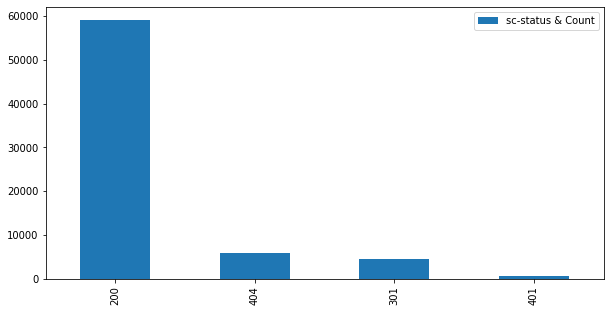

In [18]:
testcs4.plot(kind='bar', figsize=(10,5))

In [19]:
testcs4 = pd.DataFrame()
testcs4["cs-method & Counts"] = pd.DataFrame(data['cs-method'].value_counts())
testcs4.head()

,cs-method & Counts
GET,67208
POST,3113


---
#### Analysis:
There are 4 types of sc-status existing in the dataset. The sc-status <b>200</b> refers to the successfully accepted requests by server. <b>400</b> indicates an error has occured where <b>404</b> refers to the more specific cause of an error such as-not found & <b>401</b> refers to the access-denied. The sc-status 300 tells the client browser to must take more action to fulfill the request such as: <b>301</b> indicates moved permanently (HaiyingYu, 2022).
It is identified that several POST method have occured for the highest cip in login.aspx. Basically POST is used to send data to a server where GET is used to request data from a specified resource (Haiyingyu, 2022).


---

---
Now to dig deeper, rearrangement is done on a table named <b>final_table</b> after dropping some columns.Only the necessary column are kept in the final_table to analyze the suspicious IP.

---

In [20]:
final_table=pd.DataFrame(data)
final_table.drop(["s-ip", "s-port", "cs(User-Agent)", "cs(Referer)","sc-substatus","sc-win32-status"], axis = 1, inplace = True)
final_table

,date,time,cs-method,cs-uri-stem,cs-uri-query,cs-username,c-ip,sc-status,time-taken
0,2022-01-01,00:58:00,GET,gebxwxxm.css,-,-,89.251.124.218,404,30
1,2022-01-01,00:58:00,GET,aklkvtyw.css,-,-,89.251.124.218,200,22
2,2022-01-01,00:58:00,GET,ldhwqgpv.css,-,-,89.251.124.218,200,27
3,2022-01-01,00:58:00,GET,index.aspx,-,-,89.251.124.218,200,28
4,2022-01-01,00:58:25,GET,chytmwlj.js,v=521647,-,89.251.124.218,200,30
...,...,...,...,...,...,...,...,...,...
70316,2022-01-30,23:48:57,GET,transactions.aspx,page=5,ue768613,86.26.225.110,200,30
70317,2022-01-30,23:49:09,GET,footer.css,-,ue768613,86.26.225.110,200,22
70318,2022-01-30,23:49:09,GET,template.css,v=gazraojt,ue768613,86.26.225.110,200,22
70319,2022-01-30,23:49:09,GET,wzqfdtcq.css,-,ue768613,86.26.225.110,200,24


---
#### Observation:
It is clear that <b>POST methods in login.aspx</b> tell us everything. So, a count has been done for <b>sc-status 401 & cs-uri-stem login.aspx</b> to narrow down the suspicious IPs.

---

In [21]:
analysis=final_table.loc[final_table['cs-method'] == 'POST'].groupby(pd.Grouper(key='c-ip', axis=0))['cs-method'].value_counts().reset_index(name='Counts')
analysis.sort_values(by="Counts", ascending=False).head(10)

,c-ip,cs-method,Counts
995,103.211.182.34,POST,180
846,45.84.89.130,POST,67
1009,160.116.57.249,POST,46
27,194.12.8.149,POST,11
159,193.164.167.94,POST,10
64,185.97.213.168,POST,10
362,154.14.15.237,POST,9
294,199.42.180.92,POST,8
620,193.24.26.211,POST,8
217,193.150.120.222,POST,8


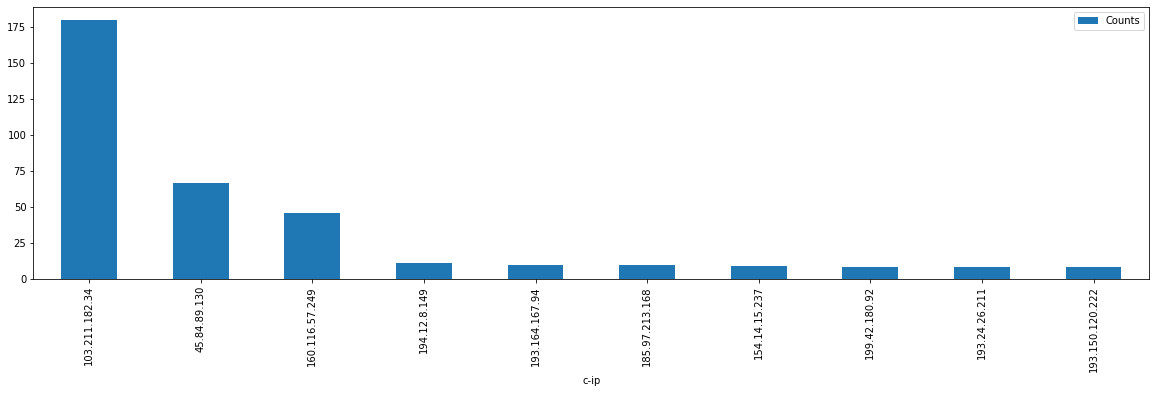

In [22]:
analysis.sort_values(by="Counts", ascending=False).head(10).plot(x='c-ip', y='Counts', kind='bar', figsize=(20,5))

In [23]:
analysis2=final_table.loc[final_table['cs-uri-stem'] == 'login.aspx'].groupby(pd.Grouper(key='c-ip', axis=0))['cs-uri-stem'].value_counts().reset_index(name='Counts')
analysis2.sort_values(by="Counts", ascending=False).head(10)

,c-ip,cs-uri-stem,Counts
995,103.211.182.34,login.aspx,174
846,45.84.89.130,login.aspx,61
1009,160.116.57.249,login.aspx,40
27,194.12.8.149,login.aspx,12
159,193.164.167.94,login.aspx,12
362,154.14.15.237,login.aspx,11
234,57.246.165.107,login.aspx,10
169,207.117.196.232,login.aspx,10
620,193.24.26.211,login.aspx,10
64,185.97.213.168,login.aspx,10


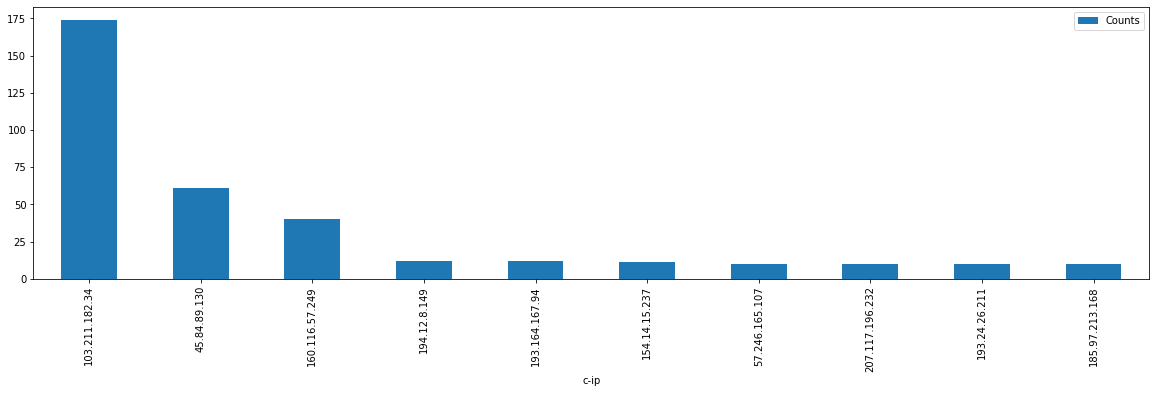

In [24]:
analysis2.sort_values(by="Counts", ascending=False).head(10).plot(x='c-ip', y='Counts', kind='bar', figsize=(20,5))

---
#### Observation:
The above two analysis indicates the first three c-ips have more POST methods which are prefarably to login.aspx page of the web server as it almost matches with the count of login.aspx page hits. Three highest <b>POST</b> counts and <b>login.aspx</b> indicates the suspected IPs are hitting the login.aspx till it finds the valid credentials or username.

---

---
Analysis of the first highest c-ip count is done below.

---

In [25]:
first_attack=final_table.loc[final_table['c-ip'] == '103.211.182.34'].groupby(pd.Grouper(key='cs-uri-stem', axis=0))['sc-status'].value_counts().reset_index(name='Counts').head().sort_values(by="Counts", ascending=False).head()
first_attack.head()

,cs-uri-stem,sc-status,Counts
2,login.aspx,401,173
0,eiownzdh.css,200,1
1,index.aspx,301,1
3,login.aspx,301,1
4,sybwkkcf.css,200,1


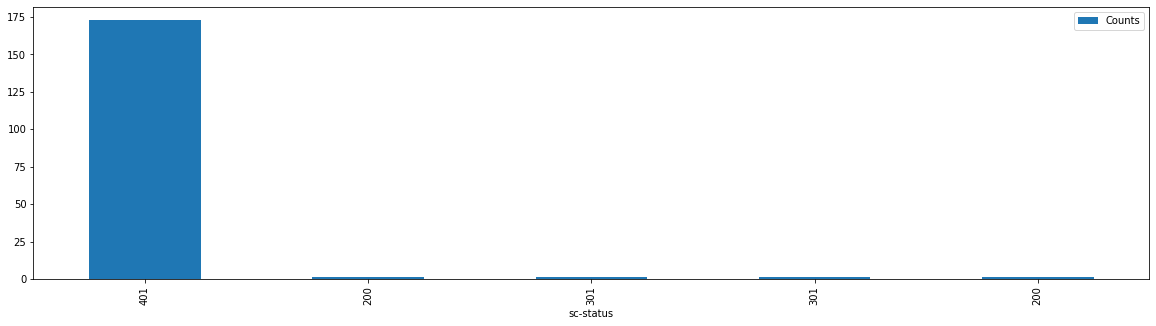

In [26]:
first_attack.plot(x='sc-status', y='Counts', kind='bar', figsize=(20,5))

In [27]:
testcs3

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
66393,2022-01-29,13:44:00,57.222.145.109,GET,eiownzdh.css,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,20
66394,2022-01-29,13:44:00,57.222.145.109,GET,index.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,301,0,0,29
66399,2022-01-29,13:44:16,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/index.aspx,401,0,0,23
66400,2022-01-29,13:44:19,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,26
66401,2022-01-29,13:44:22,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,28
66402,2022-01-29,13:44:24,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,27
66403,2022-01-29,13:44:27,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,27
66404,2022-01-29,13:44:30,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,30
66405,2022-01-29,13:44:31,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,20
66406,2022-01-29,13:44:33,57.222.145.109,POST,login.aspx,-,443,-,103.211.182.34,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,20


---
#### Observation:
<b>c-ip= 103.211.182.34 hits the login.aspx 173 times from 13:44:16 to  13:49:54 which indicates that a brute force has been launched here</b>. This is the first suspicious c-ip.

---

In [28]:
#cip analysis
second_attack=final_table.loc[final_table['c-ip'] == '45.84.89.130'].groupby(pd.Grouper(key='cs-uri-stem', axis=0))['sc-status'].value_counts().reset_index(name='Counts').head().sort_values(by="Counts", ascending=False).head()
second_attack

,cs-uri-stem,sc-status,Counts
4,login.aspx,401,60
1,template.css,200,9
0,gwzrmtvs.js,200,1
2,zfkvjtbd.js,200,1
3,index.aspx,301,1


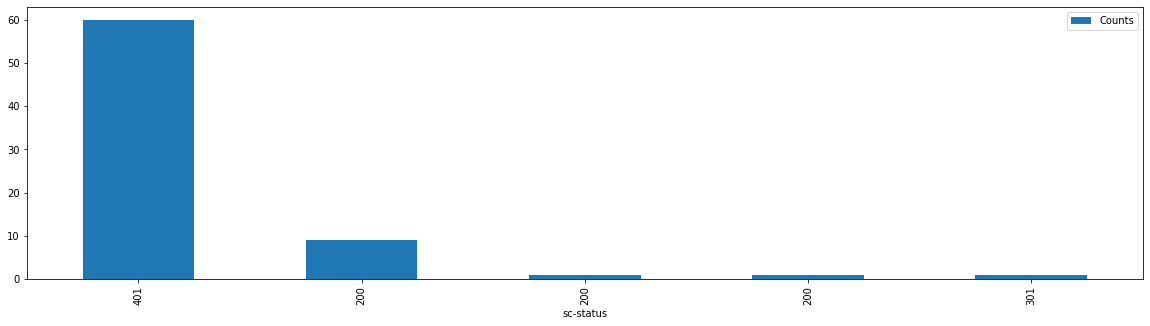

In [29]:
second_attack.plot(x='sc-status', y='Counts', kind='bar', figsize=(20,5))

In [30]:
testcs5=data[data['c-ip'].str.contains("45.84.89.130")]
testcs5

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
45300,2022-01-20,14:55:00,57.222.145.109,GET,gwzrmtvs.js,v=728188,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,25
45301,2022-01-20,14:55:00,57.222.145.109,GET,template.css,v=ffjwagua,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,22
45302,2022-01-20,14:55:00,57.222.145.109,GET,zfkvjtbd.js,v=761846,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,22
45303,2022-01-20,14:55:00,57.222.145.109,GET,index.aspx,-,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,301,0,0,23
45306,2022-01-20,14:55:10,57.222.145.109,POST,login.aspx,-,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/index.aspx,401,0,0,22
45307,2022-01-20,14:55:12,57.222.145.109,POST,login.aspx,-,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,20
45308,2022-01-20,14:55:15,57.222.145.109,POST,login.aspx,-,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,28
45309,2022-01-20,14:55:16,57.222.145.109,POST,login.aspx,-,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,28
45310,2022-01-20,14:55:19,57.222.145.109,POST,login.aspx,-,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,25
45311,2022-01-20,14:55:20,57.222.145.109,POST,login.aspx,-,443,-,45.84.89.130,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,20


---
<b>c-ip= 45.84.89.130 hits the login.aspx 60 times from 14:55:10 to  14:57:07 which indicates that a brute force has been launched here.</b> This is the second suspicious c-ip.

---

In [31]:
#cip analysis
third_attack=final_table.loc[final_table['c-ip'] == '160.116.57.249'].groupby(pd.Grouper(key='cs-uri-stem', axis=0))['sc-status'].value_counts().reset_index(name='Counts').head().sort_values(by="Counts", ascending=False).head()
third_attack

,cs-uri-stem,sc-status,Counts
4,login.aspx,401,39
0,zjqcquyq.css,404,1
1,akyodcgk.css,404,1
2,nnuxmlih.css,200,1
3,index.aspx,301,1


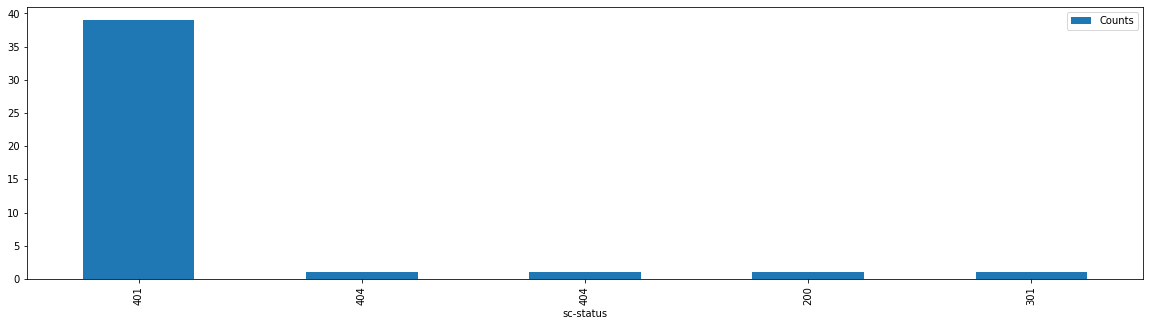

In [32]:
third_attack.plot(x='sc-status', y='Counts', kind='bar', figsize=(20,5))

In [33]:
#cip analysis
testcs6=data[data['c-ip'].str.contains("160.116.57.249")]
testcs6

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
69226,2022-01-30,18:44:00,57.222.145.109,GET,zjqcquyq.css,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,404,0,0,25
69227,2022-01-30,18:44:00,57.222.145.109,GET,akyodcgk.css,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,404,0,0,22
69228,2022-01-30,18:44:00,57.222.145.109,GET,nnuxmlih.css,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,200,0,0,27
69229,2022-01-30,18:44:00,57.222.145.109,GET,index.aspx,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,-,301,0,0,22
69242,2022-01-30,18:44:28,57.222.145.109,POST,login.aspx,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/index.aspx,401,0,0,29
69245,2022-01-30,18:44:29,57.222.145.109,POST,login.aspx,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,27
69246,2022-01-30,18:44:30,57.222.145.109,POST,login.aspx,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,25
69247,2022-01-30,18:44:32,57.222.145.109,POST,login.aspx,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,27
69248,2022-01-30,18:44:33,57.222.145.109,POST,login.aspx,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,28
69249,2022-01-30,18:44:35,57.222.145.109,POST,login.aspx,-,443,-,160.116.57.249,Mozilla/5.0+(Windows+NT+10.0;+WOW64;+Trident/7...,https://bankofpunk.local/login.aspx,401,0,0,26


---
<b>c-ip=160.116.57.249  hits the login.aspx 39 times from 18:44:28 to  18:45:36 which indicates that a brute force has been launched here.</b> This is the last suspicious c-ip.

---

---
A graph has been plotted here for the first suspected c-ip where sc-status along with counts have been displayed from above. X-axis indicates index number and y axis indicates sc-status & counts side by side.

---

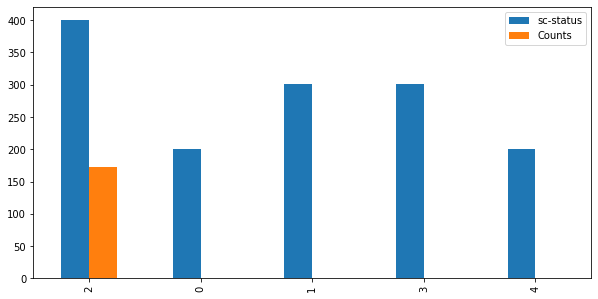

In [34]:
plt.rcParams["figure.figsize"] = (10, 5)
first_attack[0:30].plot(kind = 'bar')

For the second suspected c-ip, a line graph has been plotted which indicates cs-uri-stem in the x-axis and sc-status in the y-axis. Counts has been set by orange line where sky line indicates sc-status.

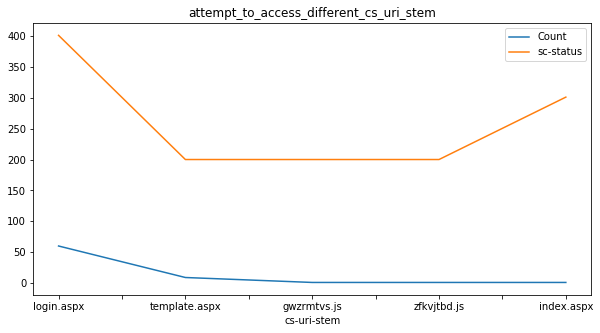

In [35]:
import pandas as pd

import matplotlib.pyplot as plot
attempt_to_access_different_cs_uri_stem = {"cs-uri-stem": ["login.aspx", "template.aspx","gwzrmtvs.js","zfkvjtbd.js","index.aspx"],
                                        "Count": [60, 9,1,1,1],
                                        "sc-status": [401,200,200,200,301]
                                          };

             

df = pd.DataFrame(data=attempt_to_access_different_cs_uri_stem);

 

# Draw a line chart

df.plot.line(x="cs-uri-stem", title="attempt_to_access_different_cs_uri_stem")

plot.show(block=False);

For the third suspected ip a pie graph has been plotted which indicates hit in different cs-uri-stems.

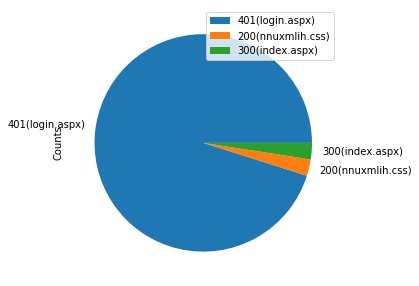

In [36]:
# creating dataframe

df = pd.DataFrame({'Counts': [39, 1, 1],

                   'sc-status_&_uri_stem': ['401(login.aspx)', '200(abc.aspx)', '300(index.aspx)']},

                  index=['401(login.aspx)', '200(nnuxmlih.css)', '300(index.aspx)'])

plot = df.plot.pie(y='Counts', figsize=(5, 5))


---
### Suspicious IP List

    1. 103.211.182.34
    2. 45.84.89.130
    3. 160.116.57.249
    
---

---
### References
HaiyingYu (2022) HTTP status code overview - Internet Information Services Microsoft.com. [online]. Available from: https://docs.microsoft.com/en-us/troubleshoot/developer/webapps/iis/www-administration-management/http-status-code [Accessed 13 April 2022].
‘[MS-WMLOG]: Cs-User-agent’ (2022) Microsoft.com. [online]. Available from: https://docs.microsoft.com/en-us/openspecs/windows_protocols/ms-wmlog/65b1c4e6-f07d-43e3-957c-4a7e64fca4ec [Accessed 13 April 2022].
     
---


---
### Self-Assessment

- **Identification of the suspicious activity (25%)**: -**25%.**

- **Analytical reasoning and rationale (25%)**: -**25%.**

- **Python and Pandas proficiency (25%)**: -**20%.**

- **Clarity and professional report presentation (25%)**: -**25%.**

Please provide a minimum of two sentences to comment and reflect on your own self-assessment: Log file analysis has been done successfully & suspected ip's have been found. The identification has been explained with necessary graphical representation. 